In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('Goa.csv')
df1=pd.read_csv('weekly_data.csv')

In [ ]:
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
0,January,2010,100,45,303588,62.12
1,February,2010,80,44,274509,59.45
2,March,2010,120,39,254800,61.23
3,April,2010,140,35,239143,63.01
4,May,2010,130,36,225558,64.79


In [ ]:
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
0,2010,January,2010-January-1,34.003869,15.301741,103231.665252,21.123203
1,2010,January,2010-January-2,32.096470,14.443411,97441.029990,19.938327
2,2010,January,2010-January-3,24.288959,10.930031,73738.364294,15.088301
3,2010,January,2010-January-4,9.610703,4.324816,29176.940464,5.970169
4,2010,February,2010-February-1,23.188926,12.753909,79569.609443,17.232270


In [ ]:
df['Month'] = df['Month'].map({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})
df1['Month'] = df1['Month'].map({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})

In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype('str')+'-'+df['Month'].astype('str')+'-'+'01')
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Date
0,1,2010,100,45,303588,62.12,2010-01-01
1,2,2010,80,44,274509,59.45,2010-02-01
2,3,2010,120,39,254800,61.23,2010-03-01
3,4,2010,140,35,239143,63.01,2010-04-01
4,5,2010,130,36,225558,64.79,2010-05-01


In [ ]:
df1['Week'] = df1['Date'].str[-1:]
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Week
0,2010,1,2010-January-1,34.003869,15.301741,103231.665252,21.123203,1
1,2010,1,2010-January-2,32.096470,14.443411,97441.029990,19.938327,2
2,2010,1,2010-January-3,24.288959,10.930031,73738.364294,15.088301,3
3,2010,1,2010-January-4,9.610703,4.324816,29176.940464,5.970169,4
4,2010,2,2010-February-1,23.188926,12.753909,79569.609443,17.232270,1


In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
Month,1.000000e+00,1.195782e-14,0.389627,0.100718,0.005589,0.875517
Year,1.195782e-14,1.000000e+00,0.181351,0.758008,0.506196,0.416609
Hotel_Revenue,3.896269e-01,1.813513e-01,1.000000,0.596231,0.689808,0.436654
Trends,1.007181e-01,7.580079e-01,0.596231,1.000000,0.884031,0.415287
Flight_Traffic,5.588931e-03,5.061960e-01,0.689808,0.884031,1.000000,0.225063
Crime_Rate,8.755169e-01,4.166089e-01,0.436654,0.415287,0.225063,1.000000


In [ ]:
df1.corr()

<ipython-input-24-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Year,Month,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
Year,1.000000e+00,-6.317438e-15,0.124383,0.442137,0.385176,0.097052
Month,-6.317438e-15,1.000000e+00,0.267233,0.058748,0.004253,0.203959
Hotel_Revenue,1.243833e-01,2.672333e-01,1.000000,0.809122,0.812584,0.740713
Trends,4.421370e-01,5.874769e-02,0.809122,1.000000,0.904496,0.824257
Flight_Traffic,3.851763e-01,4.252748e-03,0.812584,0.904496,1.000000,0.613732
Crime_Rate,9.705242e-02,2.039587e-01,0.740713,0.824257,0.613732,1.000000


In [ ]:
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Date
0,1,2010,100,45,303588,62.12,2010-01-01
1,2,2010,80,44,274509,59.45,2010-02-01
2,3,2010,120,39,254800,61.23,2010-03-01
3,4,2010,140,35,239143,63.01,2010-04-01
4,5,2010,130,36,225558,64.79,2010-05-01


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on your data
scaler.fit(df[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

# Transform the data
df[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']] = scaler.transform(df[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

In [ ]:
print(df.columns,'\n', df1.columns)

Index(['Month', 'Year', 'Hotel_Revenue', 'Trends', 'Flight_Traffic',
       'Crime_Rate', 'Date'],
      dtype='object') 
 Index(['Year', 'Month', 'Date', 'Hotel_Revenue', 'Trends', 'Flight_Traffic',
       'Crime_Rate', 'Week'],
      dtype='object')


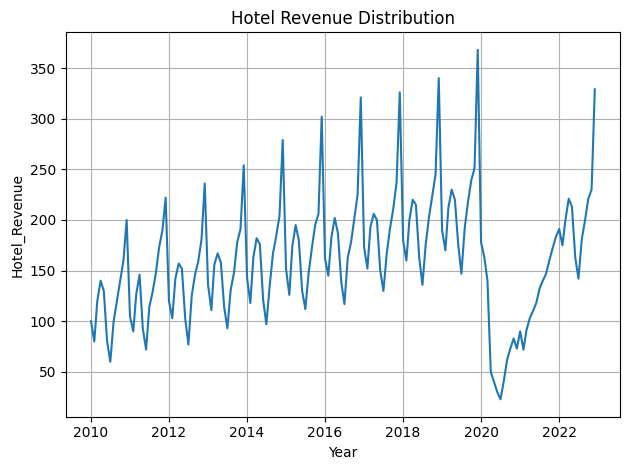

In [ ]:
fig, ax =plt.subplots(1,1)
ax.plot(df['Date'], df['Hotel_Revenue'])
plt.xlabel('Year')
plt.ylabel('Hotel_Revenue')
plt.title('Hotel Revenue Distribution')
plt.grid()
plt.tight_layout()

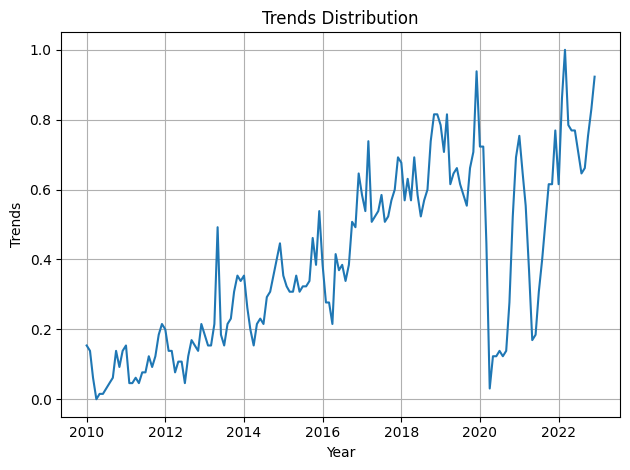

In [ ]:
fig, ax =plt.subplots(1,1)
ax.plot(df['Date'], df['Trends'])
plt.xlabel('Year')
plt.ylabel('Trends')
plt.title('Trends Distribution')
plt.grid()
plt.tight_layout()

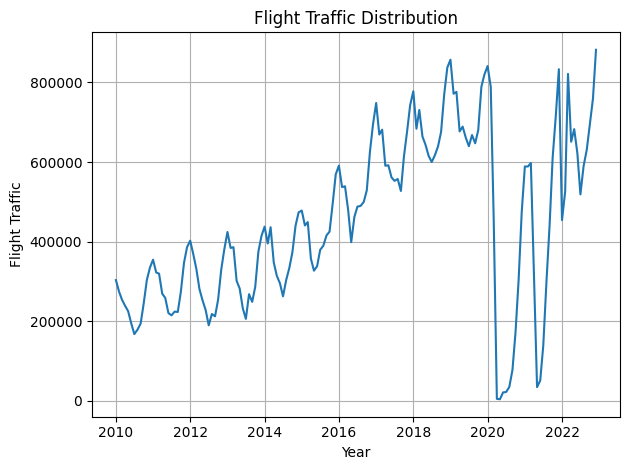

In [ ]:
fig, ax =plt.subplots(1,1)
ax.plot(df['Date'], df['Flight_Traffic'])
plt.xlabel('Year')
plt.ylabel('Flight Traffic')
plt.title('Flight Traffic Distribution')
plt.grid()
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x790927d799c0>,
 [Text(1.0686736899121454, 0.260646397422945, '1'),
  Text(0.8512291384814287, 0.6967129637089903, '2'),
  Text(0.4441692580549637, 1.0063367578494304, '3'),
  Text(-0.1345264008055554, 1.0917429402044712, '4'),
  Text(-0.6722533307498698, 0.8706752892414636, '5'),
  Text(-0.985347195251735, 0.48896922685332606, '6'),
  Text(-1.095097781111568, 0.10373451597477357, '7'),
  Text(-1.0491446529170347, -0.33059869518132506, '8'),
  Text(-0.770368135330438, -0.7851961131255707, '9'),
  Text(-0.24022745105252075, -1.0734480759500242, '10'),
  Text(0.42275581771762655, -1.01551834970418, '11'),
  Text(1.0008953548036574, -0.45629868368477794, '12')],
 [Text(0.5829129217702611, 0.14217076223069725, '7.6%'),
  Text(0.4643068028080519, 0.3800252529321765, '6.6%'),
  Text(0.2422741407572529, 0.5489109588269621, '8.3%'),
  Text(-0.0733780368030302, 0.5954961492024388, '8.8%'),
  Text(-0.36668363495447437, 0.47491379413170737, '8.2%'),
  Text(-0.53746

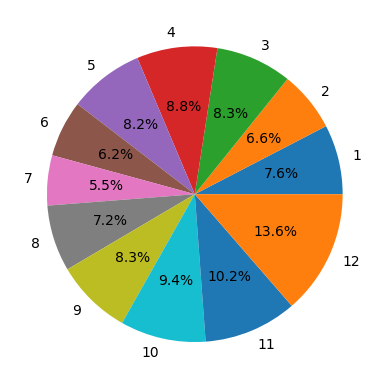

In [ ]:
d = df[['Hotel_Revenue','Month']].groupby(by='Month').mean()
plt.pie(d.values.reshape(1,-1)[0], labels=d.index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x790927e0d6f0>,
 [Text(1.0422920577592822, 0.35160669267225414, '1'),
  Text(0.6369632478024442, 0.8968153772928753, '2'),
  Text(0.012268850990162927, 1.0999315775517045, '3'),
  Text(-0.551089930873963, 0.9519978403806024, '4'),
  Text(-0.905910945940134, 0.6239594201755846, '5'),
  Text(-1.080128728066323, 0.20813921015951684, '6'),
  Text(-1.0763063002650493, -0.22707872645794436, '7'),
  Text(-0.8944891431682216, -0.6402258763547293, '8'),
  Text(-0.5317399365277901, -0.9629395826849274, '9'),
  Text(-0.016489998794069434, -1.0998763930277673, '10'),
  Text(0.581661194837201, -0.9336328263405052, '11'),
  Text(1.0327754882754303, -0.3786486376806958, '12')],
 [Text(0.5685229405959721, 0.1917854687303204, '10.4%'),
  Text(0.34743449880133315, 0.4891720239779319, '9.6%'),
  Text(0.006692100540088868, 0.599962678664566, '9.7%'),
  Text(-0.3005945077494343, 0.5192715492985104, '7.4%'),
  Text(-0.494133243240073, 0.34034150191395524, '6.7%'),
  Text(-0.5

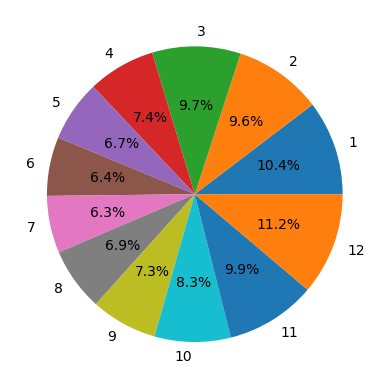

In [ ]:
d = df[['Flight_Traffic','Month']].groupby(by='Month').mean()
plt.pie(d.values.reshape(1,-1)[0], labels=d.index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7e6bdf73a7d0>,
 [Text(1.0499451437873633, 0.3280475499639237, '1'),
  Text(0.7000457809913744, 0.8484903679572191, '2'),
  Text(0.15350932836049558, 1.0892359184796974, '3'),
  Text(-0.36091425473312616, 1.0391058178695913, '4'),
  Text(-0.7639305103036086, 0.7914607857798567, '5'),
  Text(-1.0306034326549216, 0.38452121475920276, '6'),
  Text(-1.0976565963722305, -0.07176347567203434, '7'),
  Text(-0.9680922722697971, -0.5223000597084988, '8'),
  Text(-0.6417947062006379, -0.8933641783129861, '9'),
  Text(-0.10970242203485386, -1.0945160476665872, '10'),
  Text(0.5306566131162608, -0.9635370044559676, '11'),
  Text(1.0228432085371806, -0.40471196022525224, '12')],
 [Text(0.5726973511567436, 0.1789350272530493, '9.6%'),
  Text(0.3818431532680223, 0.4628129279766649, '8.8%'),
  Text(0.08373236092390668, 0.5941286828071075, '8.7%'),
  Text(-0.19686232076352336, 0.5667849915652315, '6.4%'),
  Text(-0.41668936925651373, 0.4317058831526491, '7.4%'),
  Text(-

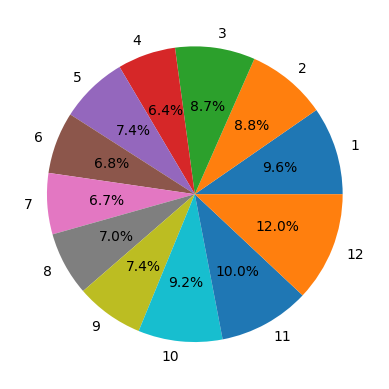

In [ ]:
d = df[['Trends','Month']].groupby(by='Month').mean()
plt.pie(d.values.reshape(1,-1)[0], labels=d.index, autopct='%.1f%%')

<BarContainer object of 13 artists>

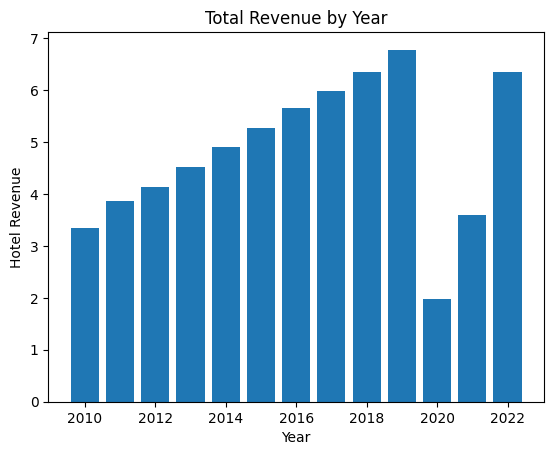

In [ ]:
d = df[['Hotel_Revenue','Year']].groupby(by='Year').sum()
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Hotel Revenue')
plt.bar(d.index, d.values.reshape(1,-1)[0])

<BarContainer object of 13 artists>

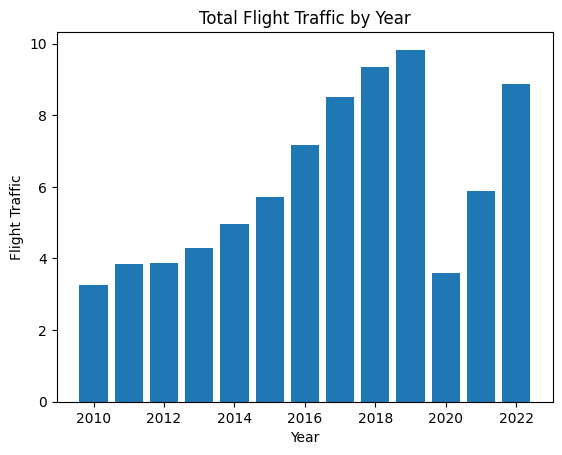

In [ ]:
d = df[['Flight_Traffic','Year']].groupby(by='Year').sum()
plt.title('Total Flight Traffic by Year')
plt.xlabel('Year')
plt.ylabel('Flight Traffic')
plt.bar(d.index, d.values.reshape(1,-1)[0])

<BarContainer object of 13 artists>

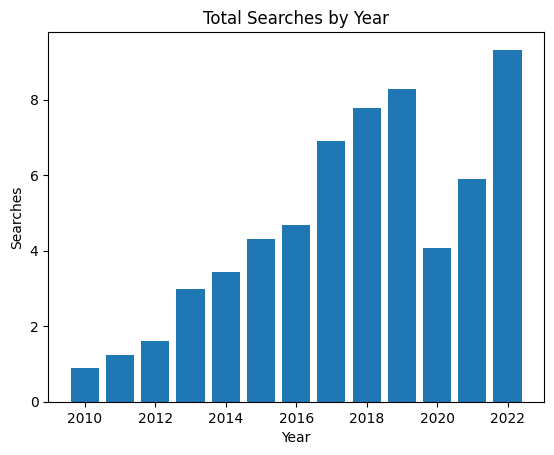

In [ ]:
d = df[['Trends','Year']].groupby(by='Year').sum()
plt.title('Total Searches by Year')
plt.xlabel('Year')
plt.ylabel('Searches')
plt.bar(d.index, d.values.reshape(1,-1)[0])

<ipython-input-31-55e4c5621be2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


<Axes: >

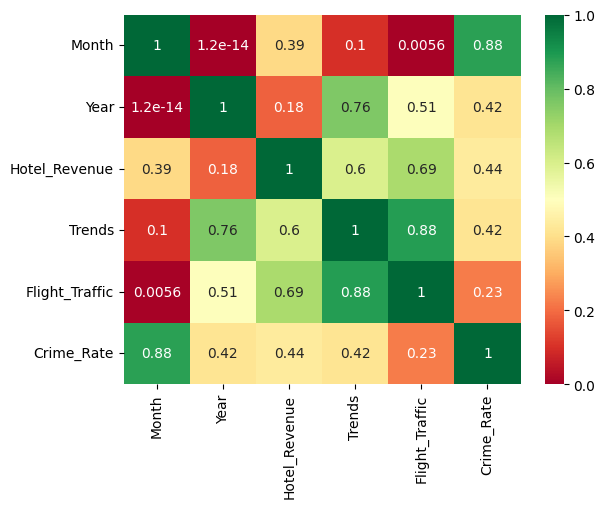

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

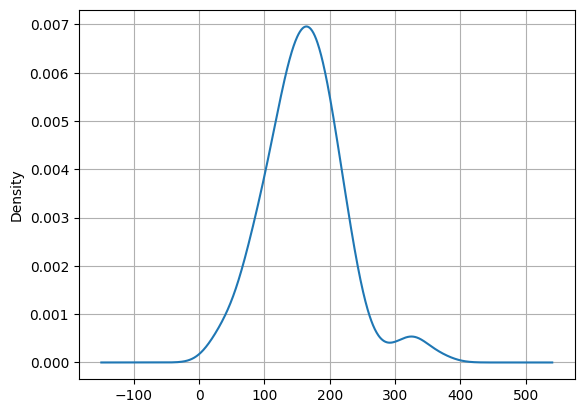

In [ ]:
df['Hotel_Revenue'].plot.kde()
plt.grid()

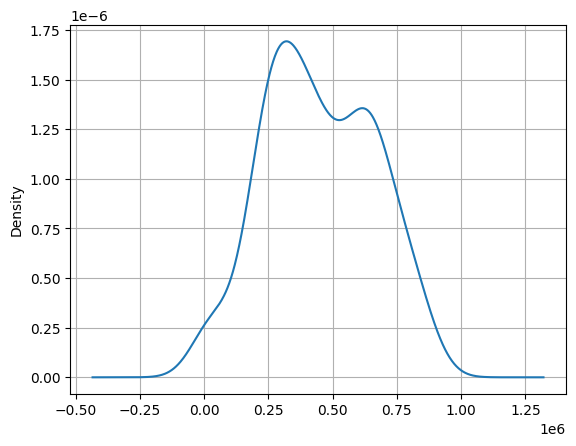

In [ ]:
df['Flight_Traffic'].plot.kde()
plt.grid()

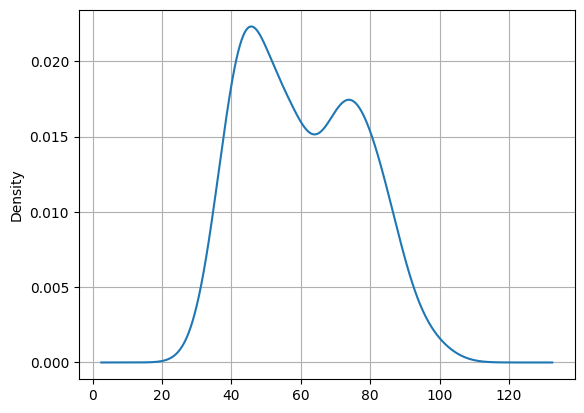

In [ ]:
df['Trends'].plot.kde()
plt.grid()

In [ ]:
scaler1 = MinMaxScaler()

# Fit the scaler on your data
scaler1.fit(df1[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

# Transform the data
df1[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']] = scaler.transform(df1[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

In [ ]:
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Week
0,2010,1,2010-January-1,0.031895,-0.303050,0.112674,-1.409073,1
1,2010,1,2010-January-2,0.026367,-0.316255,0.106075,-1.452635,2
2,2010,1,2010-January-3,0.003736,-0.370307,0.079063,-1.630945,3
3,2010,1,2010-January-4,-0.038810,-0.471926,0.028280,-1.966170,4
4,2010,2,2010-February-1,0.000548,-0.342248,0.085709,-1.552122,1


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_results=adfuller(df['Flight_Traffic'])

In [ ]:
def adfuller_test(sales):
  results=adfuller(df['Flight_Traffic'])
  labels=['ADF Test Statistics','p-value','Lags Used','Number of Observations Used']
  for value,label in zip(results,labels):
    print(label + ' : ' + str(value))
  if results[1]<=0.11:
      print("Stationary")
  else:
      print("Not Stationary")

In [ ]:
adfuller_test(df['Flight_Traffic'])

ADF Test Statistics : -2.553221285397975
p-value : 0.10305593893832743
Lags Used : 14
Number of Observations Used : 141
Stationary


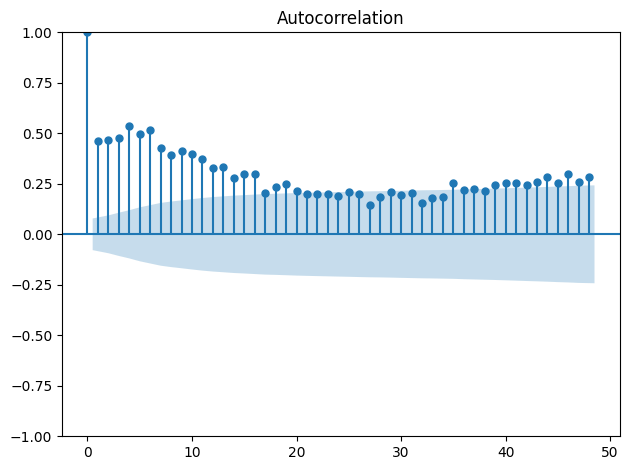

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

data = df1['Flight_Traffic']
plot_acf(data,lags=48)
plt.tight_layout()
plt.show()

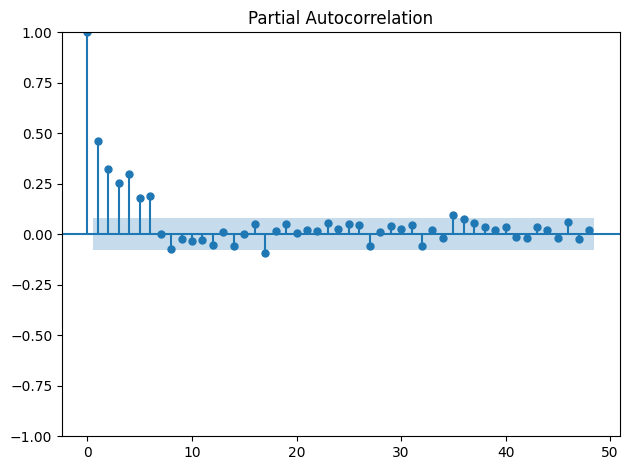

In [ ]:
data = df1['Flight_Traffic']
plot_pacf(data,lags=48)
plt.tight_layout()
plt.show()

In [ ]:
df1['Prev1'] = df1['Flight_Traffic'].shift(1)
df1['Prev4'] = df1['Flight_Traffic'].shift(4)

In [ ]:
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Week,Prev1,Prev4
0,2010,1,2010-January-1,0.031895,-0.303050,0.112674,-1.409073,1,NaN,NaN
1,2010,1,2010-January-2,0.026367,-0.316255,0.106075,-1.452635,2,0.112674,NaN
2,2010,1,2010-January-3,0.003736,-0.370307,0.079063,-1.630945,3,0.106075,NaN
3,2010,1,2010-January-4,-0.038810,-0.471926,0.028280,-1.966170,4,0.079063,NaN
4,2010,2,2010-February-1,0.000548,-0.342248,0.085709,-1.552122,1,0.028280,0.112674


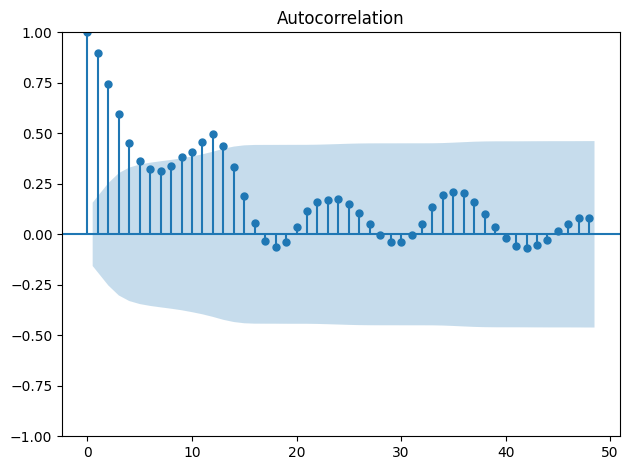

In [ ]:
data = df['Flight_Traffic']
plot_acf(data,lags=48)
plt.tight_layout()
plt.show()

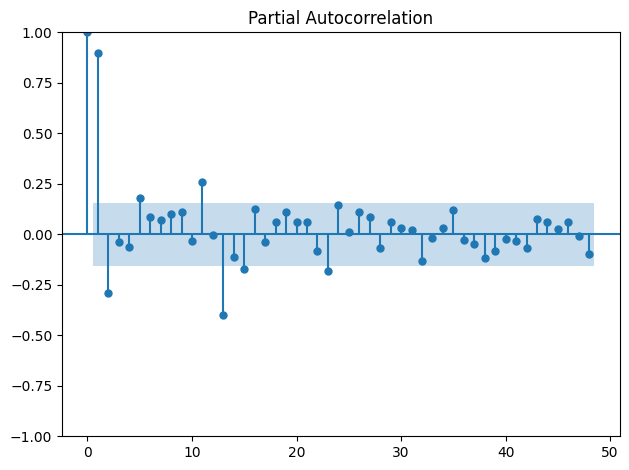

In [ ]:
data = df['Flight_Traffic']
plot_pacf(data,lags=48)
plt.tight_layout()
plt.show()

In [ ]:
df['Prev1'] = df['Flight_Traffic'].shift(1)
df['Prev12'] = df['Flight_Traffic'].shift(12)
df['Prev14'] = df['Flight_Traffic'].shift(14)

In [ ]:
df['Trends1'] = df['Trends'].shift(1)
df['Trends2'] = df['Trends'].shift(2)
df['Trends3'] = df['Trends'].shift(3)
df['Trends4'] = df['Trends'].shift(4)

In [ ]:
df.iloc[3:][['Trends1','Trends2','Trends3','Trends4','Flight_Traffic']].corr()

,Trends1,Trends2,Trends3,Trends4,Flight_Traffic
Trends1,1.000000,0.916587,0.837127,0.750070,0.856142
Trends2,0.916587,1.000000,0.915893,0.836109,0.776498
Trends3,0.837127,0.915893,1.000000,0.915343,0.671696
Trends4,0.750070,0.836109,0.915343,1.000000,0.541534
Flight_Traffic,0.856142,0.776498,0.671696,0.541534,1.000000


In [ ]:
print(df.columns)
print(df1.columns)

Index(['Month', 'Year', 'Hotel_Revenue', 'Trends', 'Flight_Traffic',
       'Crime_Rate', 'Date', 'Prev1', 'Prev12', 'Prev14'],
      dtype='object')
Index(['Year', 'Month', 'Date', 'Hotel_Revenue', 'Trends', 'Flight_Traffic',
       'Crime_Rate', 'Week', 'Prev1', 'Prev4'],
      dtype='object')


In [ ]:
X1 = df[['Month','Year','Hotel_Revenue', 'Trends1','Trends2','Trends3', 'Prev1', 'Prev12', 'Prev14']]
y1 = df['Flight_Traffic']

X1.shape

(156, 9)

In [ ]:
X1_train = X1.iloc[:-12]
X1_test = X1.iloc[-12:]

y1_train = y1.iloc[:-12]
y1_test = y1.iloc[-12:]

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

model1 = XGBRegressor(objective='reg:squarederror', random_state=42)
model2 = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                          depth=6,  # Depth of the trees
                          learning_rate=0.1,  # Learning rate
                          loss_function='RMSE',  # Loss function for regression
                          random_state=42)
model3 = RandomForestRegressor(random_state=42)

In [ ]:
model1.fit(X1_train, y1_train)
model2.fit(X1_train, y1_train)
# model3.fit(X1_train, y1_train)

0:	learn: 0.2218593	total: 2.5ms	remaining: 2.5s
1:	learn: 0.2072180	total: 9.21ms	remaining: 4.6s
2:	learn: 0.1947030	total: 10.9ms	remaining: 3.61s
3:	learn: 0.1824509	total: 12.2ms	remaining: 3.03s
4:	learn: 0.1715854	total: 13.4ms	remaining: 2.66s
5:	learn: 0.1620236	total: 14.8ms	remaining: 2.44s
6:	learn: 0.1536709	total: 18.7ms	remaining: 2.65s
7:	learn: 0.1449317	total: 20.2ms	remaining: 2.5s
8:	learn: 0.1372176	total: 21.6ms	remaining: 2.37s
9:	learn: 0.1308158	total: 22.7ms	remaining: 2.25s
10:	learn: 0.1238198	total: 24.4ms	remaining: 2.2s
11:	learn: 0.1183949	total: 28ms	remaining: 2.31s
12:	learn: 0.1130122	total: 29.4ms	remaining: 2.23s
13:	learn: 0.1085997	total: 41.1ms	remaining: 2.89s
14:	learn: 0.1044138	total: 43ms	remaining: 2.82s
15:	learn: 0.1003030	total: 46.1ms	remaining: 2.84s
16:	learn: 0.0958783	total: 48.9ms	remaining: 2.83s
17:	learn: 0.0921386	total: 51.8ms	remaining: 2.83s
18:	learn: 0.0887874	total: 54.5ms	remaining: 2.81s
19:	learn: 0.0859088	total: 57.

In [ ]:
yhat1 = model1.predict(X1_test)
yhat2 = model2.predict(X1_test)
# yhat3 = model3.predict(X1_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('XGBoost: ',np.sqrt(mean_squared_error(yhat1, y1_test)), r2_score(y1_test, yhat1))
print('CatBoost: ',np.sqrt(mean_squared_error(yhat2, y1_test)), r2_score(y1_test, yhat2))
# print('RandomForest: ',np.sqrt(mean_squared_error(yhat3, y1_test)), r2_score(y1_test, yhat3))

XGBoost:  0.16079515246608542 -0.37609241545507355
CatBoost:  0.1264688741132351 0.14872671952710192


In [ ]:
np.sqrt(np.var(df['Flight_Traffic']))

0.23983694096431243

In [ ]:
!pip install lazypredict

In [ ]:
df1['Trends4'] = df['Trends'].shift(4)
df1['Trends8'] = df['Trends'].shift(8)
df1['Trends12'] = df['Trends'].shift(12)

In [ ]:
df1.columns

Index(['Year', 'Month', 'Date', 'Hotel_Revenue', 'Trends', 'Flight_Traffic',
       'Crime_Rate', 'Week', 'Prev1', 'Prev4', 'Trends4', 'Trends8',
       'Trends12'],
      dtype='object')

In [ ]:
X2 = df1[['Year','Month','Hotel_Revenue','Trends4','Trends8','Trends12','Week','Prev1','Prev4']]
y2 = df1['Flight_Traffic']

X2_train = X2[12:-48]
X2_test = X2[-48:]
y2_train = y2[12:-48]
y2_test = y2[-48:]

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X2_train, X2_test, y2_train, y2_test)

 21%|██▏       | 9/42 [00:00<00:02, 12.61it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 79%|███████▊  | 33/42 [00:02<00:00, 16.42it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:03<00:00, 13.53it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 12
[LightGBM] [Info] Start training from score 0.119164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoCV,0.71,0.77,0.04,0.07
LassoLarsCV,0.71,0.77,0.04,0.03
LarsCV,0.71,0.77,0.04,0.05
ElasticNetCV,0.71,0.77,0.04,0.07
OrthogonalMatchingPursuit,0.71,0.77,0.04,0.02
AdaBoostRegressor,0.71,0.76,0.04,0.22
HuberRegressor,0.70,0.76,0.04,0.03
LassoLarsIC,0.70,0.75,0.04,0.02
OrthogonalMatchingPursuitCV,0.69,0.75,0.04,0.02


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
data = df[['Date','Flight_Traffic']][:-11]
data.columns = ['ds','y']

In [ ]:
m = Prophet()
m.fit(data)

future = m.make_future_dataframe(periods=12, freq='M')
future

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpix26ew87/o694w8r0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpix26ew87/htv6nffj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76964', 'data', 'file=/tmp/tmpix26ew87/o694w8r0.json', 'init=/tmp/tmpix26ew87/htv6nffj.json', 'output', 'file=/tmp/tmpix26ew87/prophet_modeln7mvi3p2/prophet_model-20231013133009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
...,...
152,2022-08-31
153,2022-09-30
154,2022-10-31
155,2022-11-30


In [ ]:
## Forecasting the values of Tourist Arrivals for the next 12 months
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
145,2022-01-31,586758.269919,412637.716475,769631.500608
146,2022-02-28,562462.999748,391417.926729,731917.419800
147,2022-03-31,452683.501288,262606.407191,619300.245266
148,2022-04-30,409049.039899,226173.290775,573016.927456
149,2022-05-31,384631.087817,193355.069508,570770.040236
150,2022-06-30,374178.317559,192342.875090,545234.268023
151,2022-07-31,404349.057575,223205.267589,574702.648495
152,2022-08-31,420305.277533,249603.481868,596613.313310
153,2022-09-30,475358.028298,302614.781494,652642.463519
154,2022-10-31,564005.256260,381703.304454,738835.956051


In [ ]:
from sklearn.metrics import r2_score
y_test = data['y']
r2_score(y_test, forecast['yhat'][:-12])

0.5366703125044491

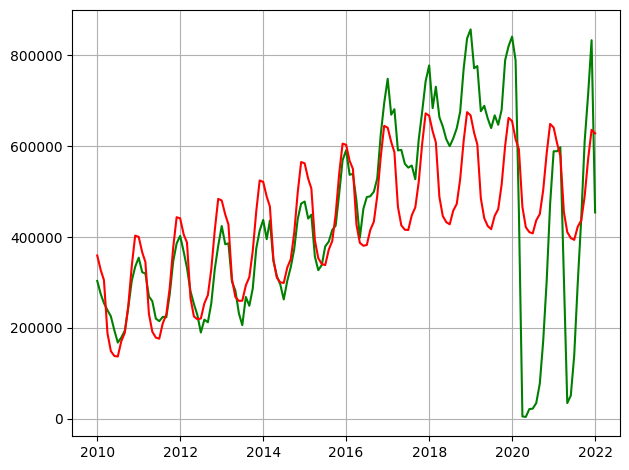

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(data['ds'], y_test, color='g')
ax.plot(data['ds'], forecast['yhat'][:-12], color='r')
plt.grid()
plt.tight_layout()

In [ ]:
df.tail()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Date
151,8,2022,181,77,589634,79.87,2022-08-01
152,9,2022,200,78,630465,81.54,2022-09-01
153,10,2022,221,84,692768,83.21,2022-10-01
154,11,2022,230,89,758900,84.36,2022-11-01
155,12,2022,329,95,881843,86.65,2022-12-01


In [ ]:
data2 = df[['Date','Flight_Traffic']]
data2.columns = ['ds','y']
data2= data2[data2['ds'].dt.year != 2020]
data2.shape

(144, 2)

In [ ]:
data2['ds'].tail()

151   2022-08-01
152   2022-09-01
153   2022-10-01
154   2022-11-01
155   2022-12-01
Name: ds, dtype: datetime64[ns]

In [ ]:
m = Prophet()
m.fit(data2)

future = m.make_future_dataframe(periods=12, freq='M')
future.shape

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpix26ew87/u7bbbme7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpix26ew87/dij4pgjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66036', 'data', 'file=/tmp/tmpix26ew87/u7bbbme7.json', 'init=/tmp/tmpix26ew87/dij4pgjg.json', 'output', 'file=/tmp/tmpix26ew87/prophet_modelten5l2od/prophet_model-20231013134134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(156, 1)

In [ ]:
future.tail()

,ds
151,2023-07-31
152,2023-08-31
153,2023-09-30
154,2023-10-31
155,2023-11-30


In [ ]:
## Forecasting the values of Tourist Arrivals for the next 12 months
forecast2 = m.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
144,2022-12-31,716925.342517,588628.723937,840027.668131
145,2023-01-31,676700.212948,545286.121293,809871.596871
146,2023-02-28,704880.406348,568446.331770,823174.905214
147,2023-03-31,604019.913042,468801.416053,734435.848590
148,2023-04-30,570125.634299,447606.355139,700125.079295
149,2023-05-31,543978.347079,408279.291248,670979.024096
150,2023-06-30,526520.226981,390979.450683,658757.305375
151,2023-07-31,560708.562473,422017.904071,701042.110794
152,2023-08-31,577730.967216,443144.736992,700041.954393
153,2023-09-30,628515.782104,496965.691780,753121.705829


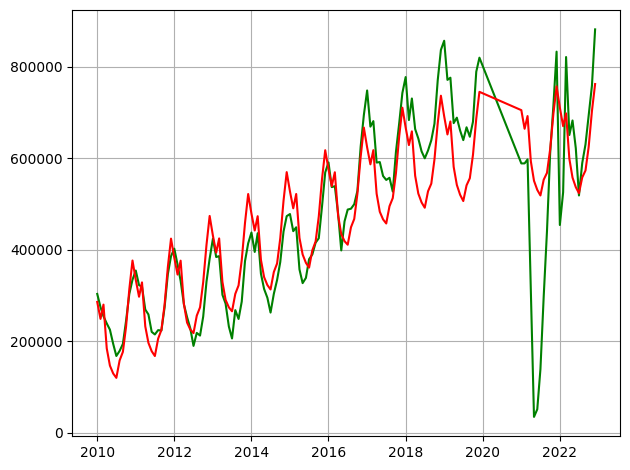

In [ ]:
y_test = data2['y']
fig, ax = plt.subplots(1,1)
ax.plot(data2['ds'], y_test, color='g')
ax.plot(data2['ds'], forecast2['yhat'][:-12], color='r')
plt.grid()
plt.tight_layout()

In [ ]:
data2[data2['ds'].dt.year==2020]

,ds,y
